MEMO:
    
    1)  Evaluar sobre el conjunto de entrenamiento da error "ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets"

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

#Agregados
from sklearn.linear_model import SGDClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from utils import plot_confusion_matrix

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

In [3]:
# Loan dataset based on the Kaggle Home Equity dataset
# Available at: https://www.kaggle.com/ajay1735/hmeq-data
#
# Context
# =======
# The consumer credit department of a bank wants to automate the decisionmaking
# process for approval of home equity lines of credit. To do this, they will
# follow the recommendations of the Equal Credit Opportunity Act to create an
# empirically derived and statistically sound credit scoring model. The model
# will be based on data collected from recent applicants granted credit through
# the current process of loan underwriting. The model will be built from
# predictive modeling tools, but the created model must be sufficiently
# interpretable to provide a reason for any adverse actions (rejections).
#
# Content
# =======
# The Home Equity dataset (HMEQ) contains baseline and loan performance
# information for 5,960 recent home equity loans. The target (BAD) is a binary
# variable indicating whether an applicant eventually defaulted or was
# seriously delinquent. This adverse outcome occurred in 1,189 cases (20%). For
# each applicant, 12 input variables were recorded. 
#
# Attributes
# ==========
# Name    Description
# TARGET  Label: 1 = client defaulted on loan - 0 = loan repaid
# LOAN    Amount of the loan request
# MORTDUE Amount due on existing mortgage
# VALUE   Value of current property
# YOJ     Years at present job
# DEROG   Number of major derogatory reports
# DELINQ  Number of delinquent credit lines
# CLAGE   Age of oldest trade line in months
# NINQ    Number of recent credit lines
# CLNO    Number of credit lines
# DEBTINC Debt-to-income ratio

# Conjunto de datos de préstamos basado en el conjunto de datos de Kaggle Home Equity
# Disponible en: https://www.kaggle.com/ajay1735/hmeq-data
#
# Contexto
# =======
# El departamento de crédito al consumo de un banco quiere automatizar la toma de decisiones
# proceso para la aprobación de líneas de crédito con garantía hipotecaria. Para ello, harán
# seguir las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un
# modelo de calificación crediticia empíricamente derivado y estadísticamente sólido. El modelo
# se basará en datos recopilados de solicitantes recientes a los que se les otorgó crédito a través de
# el proceso actual de suscripción de préstamos. El modelo se construirá a partir de
# herramientas de modelado predictivo, pero el modelo creado debe ser lo suficientemente
# interpretable para proporcionar una razón para cualquier acción adversa (rechazos).
#
# Contenido
# =======
# El conjunto de datos sobre el valor acumulado de la vivienda (HMEQ, por sus siglas en inglés) contiene referencia
#y rendimiento del préstamo
# información de 5,960 préstamos recientes con garantía hipotecaria. El objetivo (MALO) es un binario
# variable que indica si un solicitante finalmente incumplió o fue
# gravemente delincuente. Este resultado adverso ocurrió en 1.189 casos (20%). Para
# cada solicitante, se registraron 12 variables de entrada.
#
# Atributos
# ==========
# Nombre Descripción
# Etiqueta OBJETIVO: 1 = cliente incumplió con el préstamo - 0 = préstamo reembolsado
# PRÉSTAMO Importe de la solicitud de préstamo
# MORTDUE Monto adeudado sobre la hipoteca existente
# VALOR Valor de la propiedad actual
# YOJ Años en el trabajo actual
# DEROG Número de informes despectivos importantes
# DELINQ Número de líneas de crédito morosas
# CLAGE Antigüedad de la línea comercial más antigua en meses
# NINQ Número de líneas de crédito recientes
# CLNO Número de líneas de crédito
# DEBTINC Relación deuda-ingresos



¿De qué se trata el conjunto de datos?

¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

¿Qué información (atributos) hay disponible para hacer la predicción?

¿Qué atributos imagina ud. que son los más determinantes para la predicción?

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [4]:
SGDClassifier??

In [5]:
model = SGDClassifier(random_state=0) #fijar la semilla aleatoria(?????)

In [6]:
model.fit(X_train, y_train)

SGDClassifier(random_state=0)

In [7]:
y_train_pred = model.predict(X_train)

In [8]:
y_test_pred = model.predict(X_test) 

In [9]:
#print(classification_report(X_train, y_train_pred)) #(?)

In [10]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Matrices de Confusión

In [11]:
#cm = confusion_matrix(X_train, y_train_pred) #???

In [12]:
#plot_confusion_matrix(cm, ['0','1'])

In [13]:
cm = confusion_matrix(y_test, y_test_pred)

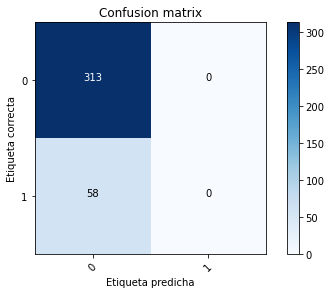

In [14]:
plot_confusion_matrix(cm, ['0','1'])

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html